# Based on: Explain Attacking BERT models using CAptum

Captum is a PyTorch library to explain neural networks
Here we show a minimal example using Captum to explain BERT models from TextAttack

In [1]:
!pip install textattack[tensorflow] tensorflow_text==2.10.0b2 captum nltk -q

     |████████████████████████████████| 415 kB 12.2 MB/s 
     |████████████████████████████████| 5.7 MB 82.9 MB/s 
     |████████████████████████████████| 1.4 MB 83.4 MB/s 
     |████████████████████████████████| 769 kB 73.3 MB/s 
     |████████████████████████████████| 4.7 MB 78.6 MB/s 
     |████████████████████████████████| 3.6 MB 52.5 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
     |████████████████████████████████| 401 kB 60.1 MB/s 
     |████████████████████████████████| 41.4 MB 7.7 MB/s 
     |████████████████████████████████| 290 kB 62.7 MB/s 
     |████████████████████████████████| 116 kB 92.1 MB/s 
     |████████████████████████████████| 373 kB 81.0 MB/s 
     |████████████████████████████████| 365 kB 78.8 MB/s 
     |████████████████████████████████| 69 kB 7.9 MB/s 
     |████████████████████████████████| 361 kB 83.4 MB/s 
     |████████████████████████████████| 125 kB 89.2 MB/s 
     |████████████████████████████████| 6.6 MB 68.4 MB/s 
     |████████████

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from copy import deepcopy
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from textattack.datasets import HuggingFaceDataset
from textattack.models.wrappers import HuggingFaceModelWrapper
from textattack.models.wrappers import ModelWrapper
from transformers import AutoModelForSequenceClassification, AutoTokenizer

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:17<00:00, 27.6MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpq5kc0q3e.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Su

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else: 
    device = torch.device("cpu")
    
print(f"Using accelerator {device}")

Using accelerator cuda:0


## Configure Model and Dataset

In [5]:
dataset = HuggingFaceDataset("ag_news", None, "train")
original_model = AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-ag-news")
original_tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-ag-news")
model = HuggingFaceModelWrapper(original_model,original_tokenizer)

Using custom data configuration default


textattack: Loading datasets dataset ag_news, split train.


Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/fb5c5e74a110037311ef5e904583ce9f8b9fbc1354290f97b4929f01b3f48b1a. Subsequent calls will reuse this data.


In [ ]:
print(model.model)

## Perform TextAttack

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from textattack.attack_recipes import PWWSRen2019
attack = PWWSRen2019.build(model)

textattack: Unknown if model of class <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.


In [ ]:
from textattack import Attacker
from textattack import AttackArgs

# attacker = Attacker(attack, dataset, attack_args=AttackArgs(num_successful_examples=100, parallel=True))
# results = attacker.attack_dataset()

## Construct Dataframe of Original and Perturbed Samples

In [ ]:
# adversarial_df = pd.DataFrame([{
#     "original_text": result.original_result.attacked_text.text,
#     "perturbed_text": result.perturbed_result.attacked_text.text,
#     "original_output": result.perturbed_result.ground_truth_output,
#     "perturbed_output": result.perturbed_result.output
#   }
#  for result in results])
# adversarial_df["result_type"] = np.where(adversarial_df["original_output"] == adversarial_df["perturbed_output"], "Failed", "Successful")
# adversarial_df = adversarial_df[adversarial_df["result_type"] == "Successful"]
# adversarial_df.to_csv("/content/pwws_attack.csv", index=False)

In [ ]:
# adversarial_df = pd.read_csv("/content/pwws_attack.csv")
# adversarial_df = adversarial_df.head(-1)

In [6]:
# DRIVE_PATH = '/content/drive/MyDrive/AdversarialXAI'
DRIVE_PATH = '/content/drive/MyDrive/NLP-Lab/AdversarialXAI'
adversarial_df = pd.read_csv(f"{DRIVE_PATH}/Adversarial Samples/Older attacks/ag-news_pwws_bert.csv", index_col="Unnamed: 0")

In [7]:
def class_name_to_index(class_name):
  if class_name == "World":
    return 0
  elif class_name == "Sports":
    return 1
  elif class_name == "Business":
    return 2
  elif class_name == "Sci/tech":
    return 3
  else:
    raise ValueError(class_name)

adversarial_df['original_class'] = adversarial_df['original_class'].map(class_name_to_index)
adversarial_df['adversarial_class'] = adversarial_df['adversarial_class'].map(class_name_to_index)

In [8]:
adversarial_df

,original_text,adversarial_text,original_class,original_confidence,adversarial_class,adversarial_confidence,attack,replace_dict,replace_num
0,Fed lifts rates a further quarter point By And...,course lifts grass a further quarter taper pas...,2,(100%),1,(78%),pwws,"{'Fed': 'course', 'rates': 'grass', 'point': '...",6
1,Indian-Americans hail Manmohan speech New York...,Indian-Americans come Manmohan delivery New Yo...,0,(100%),2,(62%),pwws,"{'hail': 'come', 'speech': 'delivery', 'meetin...",4
2,"Unisys to lay off 1,400 workers Unisys Corp. p...","Unisys to lay off 1,400 workers Unisys Corp. p...",3,(95%),2,(80%),pwws,{'cuts': 'skip'},1
3,Dollar Mired Near Lows Before Jobs Data LONDO...,Dollar involved Near Low earlier occupation Da...,2,(100%),0,(97%),pwws,"{'Mired': 'involved', 'Lows': 'Low', 'Before':...",13
4,"Keep quiet on U.S. election, Martin tells loos...","sustain calm on uracil.siemens. election, Mart...",0,(100%),1,(81%),pwws,"{'Keep': 'sustain', 'quiet': 'calm', 'U.S.': '...",13
...,...,...,...,...,...,...,...,...,...
419,EU draft draws fire in Turkey BRUSSELS: Turkey...,EEC potation haulage terminate in Turkey BRUSS...,0,(100%),2,(69%),pwws,"{'EU': 'EEC', 'draft': 'potation', 'draws': 'h...",4
420,U.S. Spies on Chat Rooms Could terrorists be p...,u.sec. espy on Chat Rooms Could terrorists be ...,3,(100%),2,(52%),pwws,"{'U.S.': 'U.sulphur.', 'Spies': 'espy'}",2
421,Stocks Climb on Drop in Consumer Prices NEW YO...,Stocks Climb on Drop in Consumer Prices Modern...,0,(100%),2,(96%),pwws,"{'NEW': 'Modern', 'Stocks': 'line', 'prices......",3
422,Sanpaolo and Dexia in merger talks By Reuters ...,Sanpaolo and Dexia in unification dialogue By ...,2,(100%),0,(99%),pwws,"{'merger': 'unification', 'talks': 'dialogue',...",6


## Calculate Attributions in Original and Perturbed Samples

In [38]:
from captum.attr import IntegratedGradients, LayerConductance, LayerIntegratedGradients, LayerDeepLiftShap, InternalInfluence, LayerGradientXActivation, LayerActivation
from captum.attr import visualization as viz

def calculate(input_ids,token_type_ids,attention_mask):
    #convert back to list of text
    return clone.model(input_ids,token_type_ids,attention_mask)[0]

clone = deepcopy(model)
clone.model.to(device)

for text_type in ["original", "adversarial"]:
  lig = LayerIntegratedGradients(calculate, clone.model.bert.embeddings)
  # lig = LayerActivation(calculate, clone.model.bert.embeddings)
  # lig = InternalInfluence(calculate, clone.model.bert.embeddings)
  # lig = LayerGradientXActivation(calculate, clone.model.bert.embeddings)
  # lig = LayerDeepLiftShap(calculate, clone.model.bert.embeddings)
  # lig = IntegratedGradients(calculate, clone.model.bert.embeddings)
  # lig = LayerConductance(calculate, clone.model.bert.embeddings)

  tokens = model.tokenizer([sentence for sentence in adversarial_df[f"{text_type}_text"]], padding="max_length", max_length=128, return_tensors="pt").to(device)
  adversarial_df[f"{text_type}_tokens"] = [tokens[x].tokens for x in range(tokens.input_ids.shape[0])]

  bsl = torch.zeros(tokens['input_ids'].size()).type(torch.LongTensor).to(device)
  labels = [i for i in adversarial_df[f"{text_type}_class"]]
  # labels = torch.tensor(labels).to(device)
  batch_size = 100

  attributions = []

  for i in range(0, len(tokens['input_ids']), batch_size): # range((len(tokens['input_ids']) // batch_size) + 1):
    attributions_next = lig.attribute(inputs=tokens['input_ids'][i:i+batch_size],
                                  #baselines=bsl,
                                  additional_forward_args=(tokens['token_type_ids'][i:i+batch_size], tokens['attention_mask'][i:i+batch_size]),
                                  #n_steps = 10,
                                  target = labels[i:i+batch_size],
                                  internal_batch_size=1
                                  )
    attributions.append(attributions_next)
    
  attributions = torch.cat(attributions)
  
  # Layer attribution
  for i in range(len(attributions[0][0])):
    adversarial_df[f"{text_type}_attribution_layer{i}"] = (attributions[:, :, i] * tokens.attention_mask).cpu().detach().numpy().tolist()

  # Summarised attributions
  atts = attributions.sum(dim=-1).squeeze(0)
  atts = atts / torch.norm(atts)
  adversarial_df[f"{text_type}_attribution"] = (atts * tokens.attention_mask).cpu().detach().numpy().tolist()

/usr/local/lib/python3.7/dist-packages/captum/attr/_utils/batching.py:48: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 100 equal to the number of examples.
  % num_examples
/usr/local/lib/python3.7/dist-packages/captum/attr/_utils/batching.py:48: UserWarning: Internal batch size cannot be less than the number of input examples. Defaulting to internal batch size of 24 equal to the number of examples.
  % num_examples
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


## **Subtract orig and adv attributions per layer**

In [70]:
for i in range(768):
  adversarial_df[f"attribution_layer{i}"] = np.square(np.subtract(
      adversarial_df[f"original_attribution_layer{i}"].to_list(),
      adversarial_df[f"adversarial_attribution_layer{i}"].to_list()
    )).sum(axis=1)
  adversarial_df[f"attribution_layer{i}"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


## **Inspect the layers with the strongest diff in attribution**

In [75]:
attribution_layer_cols = [c for c in adversarial_df.columns if c.startswith("attribution_layer")]

In [88]:
pd.DataFrame(adversarial_df[attribution_layer_cols].sum()).sort_values(by=0, ascending=False)

,0
attribution_layer308,142.783304
attribution_layer353,25.217036
attribution_layer419,22.851425
attribution_layer215,13.081515
attribution_layer577,10.334883
...,...
attribution_layer360,0.095243
attribution_layer697,0.095211
attribution_layer55,0.092959
attribution_layer359,0.092836


In [ ]:
if 'lig' in locals():
  del lig


# del clone

# prints currently alive Tensors and Variables
import torch
import gc
gc.collect()

torch.cuda.empty_cache()
print(torch.cuda.memory_summary())

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 2            |        cudaMalloc retries: 4         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    1176 MB |   13989 MB |   21935 GB |   21934 GB |
|       from large pool |    1172 MB |   13980 MB |   21931 GB |   21930 GB |
|       from small pool |       4 MB |      52 MB |       3 GB |       3 GB |
|---------------------------------------------------------------------------|
| Active memory         |    1176 MB |   13989 MB |   21935 GB |   21934 GB |
|       from large pool |    1172 MB |   13980 MB |   21931 GB |

## Inspect Attributions

In [ ]:
adversarial_df

,Unnamed: 0,original_text,adversarial_text,original_class,original_confidence,adversarial_class,adversarial_confidence,attack,replace_dict,replace_num,original_tokens,original_attribution,adversarial_tokens,adversarial_attribution
0,0,Fed lifts rates a further quarter point By And...,course lifts grass a further quarter taper pas...,2,(100%),1,(78%),pwws,"{'Fed': 'course', 'rates': 'grass', 'point': '...",6,"[[CLS], fed, lifts, rates, a, further, quarter...","[-4.001919948229497e-05, -0.003171528806010032...","[[CLS], course, lifts, grass, a, further, quar...","[-0.002535397841364225, 0.0006207059919283692,..."
1,1,Indian-Americans hail Manmohan speech New York...,Indian-Americans come Manmohan delivery New Yo...,0,(100%),2,(62%),pwws,"{'hail': 'come', 'speech': 'delivery', 'meetin...",4,"[[CLS], indian, -, americans, hail, man, ##mo,...","[0.0001678776151909666, 0.002179615025451068, ...","[[CLS], indian, -, americans, come, man, ##mo,...","[-0.0002966767546578007, -0.000659210150793579..."
2,2,"Unisys to lay off 1,400 workers Unisys Corp. p...","Unisys to lay off 1,400 workers Unisys Corp. p...",3,(95%),2,(80%),pwws,{'cuts': 'skip'},1,"[[CLS], un, ##is, ##ys, to, lay, off, 1, ,, 40...","[0.00213888264960077, 0.01153289107330356, -0....","[[CLS], un, ##is, ##ys, to, lay, off, 1, ,, 40...","[-0.00013724680038401326, -0.00136490155526892..."
3,3,Dollar Mired Near Lows Before Jobs Data LONDO...,Dollar involved Near Low earlier occupation Da...,2,(100%),0,(97%),pwws,"{'Mired': 'involved', 'Lows': 'Low', 'Before':...",13,"[[CLS], dollar, mir, ##ed, near, low, ##s, bef...","[-0.0013108277151436488, -0.001198541167208577...","[[CLS], dollar, involved, near, low, earlier, ...","[0.001347360989248638, -0.001077605571851271, ..."
4,4,"Keep quiet on U.S. election, Martin tells loos...","sustain calm on uracil.siemens. election, Mart...",0,(100%),1,(81%),pwws,"{'Keep': 'sustain', 'quiet': 'calm', 'U.S.': '...",13,"[[CLS], keep, quiet, on, u, ., s, ., election,...","[0.0011538771741240702, -0.0006181077102834455...","[[CLS], sustain, calm, on, ur, ##ac, ##il, ., ...","[-0.0021960435878585855, -0.006840183970746071..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,419,EU draft draws fire in Turkey BRUSSELS: Turkey...,EEC potation haulage terminate in Turkey BRUSS...,0,(100%),2,(69%),pwws,"{'EU': 'EEC', 'draft': 'potation', 'draws': 'h...",4,"[[CLS], eu, draft, draws, fire, in, turkey, br...","[0.0006128096101052291, 0.002816864480432227, ...","[[CLS], ee, ##c, pot, ##ation, haul, ##age, te...","[-0.00045727103495284355, 0.001296215139128099..."
420,420,U.S. Spies on Chat Rooms Could terrorists be p...,u.sec. espy on Chat Rooms Could terrorists be ...,3,(100%),2,(52%),pwws,"{'U.S.': 'U.sulphur.', 'Spies': 'espy'}",2,"[[CLS], u, ., s, ., spies, on, chat, rooms, co...","[0.001443868057470948, 0.00894518505363839, -0...","[[CLS], u, ., sec, ., es, ##py, on, chat, room...","[-0.0003544483082987809, -0.000564106935760953..."
421,421,Stocks Climb on Drop in Consumer Prices NEW YO...,Stocks Climb on Drop in Consumer Prices Modern...,0,(100%),2,(96%),pwws,"{'NEW': 'Modern', 'Stocks': 'line', 'prices......",3,"[[CLS], stocks, climb, on, drop, in, consumer,...","[0.0011683251809291068, 0.003828220705621278, ...","[[CLS], stocks, climb, on, drop, in, consumer,...","[-0.0007249377861589247, -0.003437490746327846..."
422,422,Sanpaolo and Dexia in merger talks By Reuters ...,Sanpaolo and Dexia in unification dialogue By ...,2,(100%),0,(99%),pwws,"{'merger': 'unification', 'talks': 'dialogue',...",6,"[[CLS], san, ##pa, ##olo, and, dex, ##ia, in, ...","[-0.0005829985326209021, -0.001343161823300283...","[[CLS], san, ##pa, ##olo, and, dex, ##ia, in, ...","[1.750567064881627e-05, -0.0031778308297005023..."


## Plot Attributions of Original and Perturbed Samples

0      55
1      54
2      61
3      59
4      58
       ..
419    49
420    56
421    77
422    75
423    27
Name: original_attribution, Length: 424, dtype: int64
0      56
1      54
2      61
3      58
4      61
       ..
419    52
420    59
421    77
422    78
423    35
Name: adversarial_attribution, Length: 424, dtype: int64


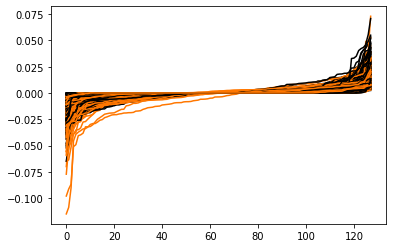

In [ ]:
num_rows, _ = adversarial_df.shape
fig, ax = plt.subplots()
for i in range(num_rows):
  ax.plot(np.sort(adversarial_df.iloc[i].original_attribution), color="black")
  ax.plot(np.sort(adversarial_df.iloc[i].adversarial_attribution), color="#FF7700")

lens = adversarial_df['original_attribution'].apply(lambda x: len(np.array(x)[np.array(x) != 0]))
print(lens)
lens = adversarial_df['adversarial_attribution'].apply(lambda x: len(np.array(x)[np.array(x) != 0]))
print(lens)

# num_rows, _ = adversarial_df.shape
# fig, axs = plt.subplots(num_rows, 1, figsize=(10, num_rows*5))

# for i in range(num_rows):
#   axs[i].plot(np.sort(adversarial_df.iloc[i].original_attribution), color="black")
#   axs[i].plot(np.sort(adversarial_df.iloc[i].perturbed_attribution), color="#FF7700")
#   axs[i].set_title(f"{adversarial_df.iloc[i].original_text}\n{adversarial_df.iloc[i].perturbed_text}")

## Preprocess the Dataframe

In [ ]:
max_tokens_original = adversarial_df["original_attribution"].apply(lambda x: len(x)).max()
max_tokens_perturbed = adversarial_df["adversarial_attribution"].apply(lambda x: len(x)).max()

In [ ]:
# X_original = adversarial_df["original_attribution"].apply(lambda x: np.array(x)).to_numpy()
# X_perturbed = adversarial_df["perturbed_attribution"].apply(lambda x: np.array(x)).to_numpy()

# Y_original = np.zeros(X_original.shape[0])
# Y_perturbed = np.ones(X_perturbed.shape[0])

# X = np.concatenate((X_original, X_perturbed))
# Y = np.concatenate((Y_original, Y_perturbed))

# # Fix the padding to alywas match n
# max_tokens = max(max_tokens_original, max_tokens_perturbed)
# X = [np.pad(x, (0, max_tokens-x.shape[0])) for x in X]

# # Convert array of arrays to 2D-array
# X = np.stack(X)

# X, Y = sklearn.utils.shuffle(X, Y, random_state=42)

In [ ]:
def pad_from_middle(x, num_pad):
  out = np.zeros(x.shape[0] + num_pad)
  middle = int(x.shape[0] / 2)
  out[:middle] = x[:middle]
  out[middle + num_pad:] = x[middle:]
  out[middle:middle + num_pad] = 0
  return out

def make_samples(df):
  X_original = df["original_attribution"].apply(lambda x: np.array(x)).to_numpy()
  X_perturbed = df["adversarial_attribution"].apply(lambda x: np.array(x)).to_numpy()

  Y_original = np.zeros(X_original.shape[0])
  Y_perturbed = np.ones(X_perturbed.shape[0])

  X = np.concatenate((X_original, X_perturbed))
  Y = np.concatenate((Y_original, Y_perturbed))

  Y = Y.astype(int)

  # Fix the padding to alywas match n
  max_tokens = max(max_tokens_original, max_tokens_perturbed)
  # X = [np.pad(x, (0, max_tokens-x.shape[0])) for x in X]
  # X = [pad_from_middle(x, max_tokens - x.shape[0]) for x in X]

  # Convert array of arrays to 2D-array
  X = np.stack(X)

  X = np.sort(X, axis=1)

  X, Y = sklearn.utils.shuffle(X, Y, random_state=42)
  return X, Y

In [ ]:
shuffled_df = adversarial_df.sample(frac=1)
train_df = shuffled_df.iloc[:int(len(shuffled_df) * 0.7)]
test_df = shuffled_df.iloc[int(len(shuffled_df) * 0.7):]

## Train an Adversarial Detector

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00       296

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       128
           1       0.64      0.62      0.63       128

    accuracy                           0.63       256
   macro avg       0.63      0.63      0.63       256
weighted avg       0.63      0.63      0.63       256



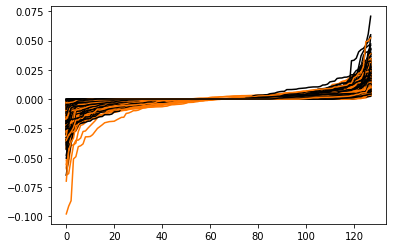

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

x_train, y_train = make_samples(train_df)
x_test, y_test = make_samples(test_df)

num_rows = len(x_train)
fig, ax = plt.subplots()
for i in range(num_rows):
  if y_train[i] == 0:
    ax.plot(x_train[i], color="black")
  else:
    ax.plot(x_train[i], color="#FF7700")

# cls = sklearn.naive_bayes.GaussianNB()
cls = RandomForestClassifier()
# cls = DecisionTreeClassifier()

cls.fit(x_train, y_train)

plt.figure(figsize=(20,20))
# sklearn.tree.plot_tree(cls, class_names=True, filled=True)
preds = cls.predict(x_test)
# draw_confusion_matrix(y_test, preds, "Gaussian Naive Bayes")

print(sklearn.metrics.classification_report(y_train, cls.predict(x_train)))
print(sklearn.metrics.classification_report(y_test, preds))

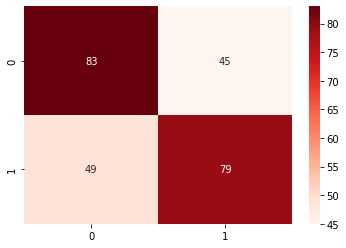

In [ ]:
import seaborn as sns

sns.heatmap(sklearn.metrics.confusion_matrix(y_test, preds), annot=True, cmap="Reds")